In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2022-03-23,-0.007004
2022-03-24,0.001722
2022-03-25,0.011517
2022-03-28,0.006847
2022-03-29,0.006542


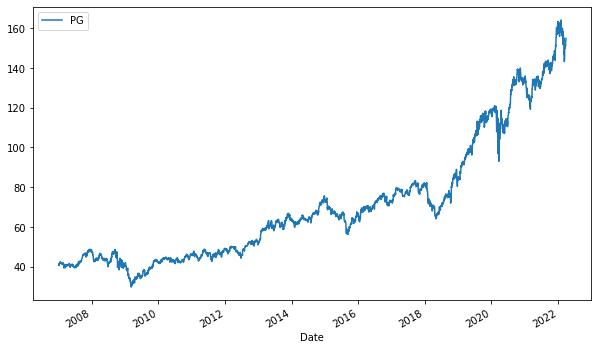

In [4]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

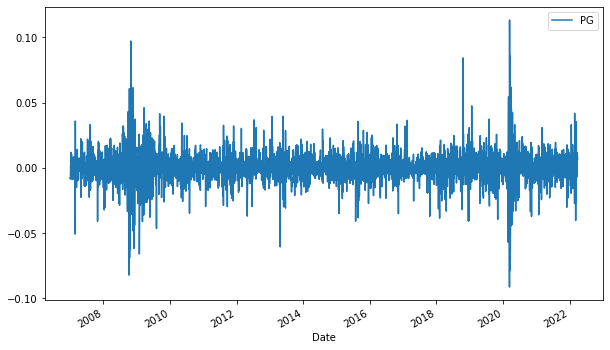

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000344
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000138
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000275
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011752
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00027509])

In [13]:
drift.values

array([0.00027509])

In [14]:
stdev.values

array([0.01175168])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.86757005, 0.27272964],
       [0.81957545, 0.97757088],
       [0.93955204, 0.90750063],
       [0.50803577, 0.00352274],
       [0.46532057, 0.72229889],
       [0.73971202, 0.45945697],
       [0.59413775, 0.27689523],
       [0.95986575, 0.43890149],
       [0.03189531, 0.95983625],
       [0.18077453, 0.29377334]])

In [17]:
norm.ppf(x)

array([[ 1.11497788, -0.60457821],
       [ 0.91374833,  2.00598124],
       [ 1.55102403,  1.32552002],
       [ 0.02014404, -2.6946871 ],
       [-0.08703822,  0.58968445],
       [ 0.64245782, -0.10180188],
       [ 0.23820191, -0.5920898 ],
       [ 1.74913031, -0.15375493],
       [-1.85364049,  1.74878904],
       [-0.91241733, -0.54239464]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.70093631,  1.79385961],
       [ 0.27029835, -0.07474174],
       [ 1.52750072, -0.30540084],
       [-1.03293516, -1.73951353],
       [-1.70981895,  1.31646967],
       [ 0.38463056,  0.24883371],
       [-2.14739909, -0.66696789],
       [-0.34604577, -1.10844587],
       [ 1.8589106 , -0.11145583],
       [-0.1534799 ,  1.05675428]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[0.99692149, 0.99871862, 0.99163195, ..., 1.00318695, 1.0109821 ,
        1.02027689],
       [0.99941429, 0.99502934, 0.99434155, ..., 1.00793836, 0.98822029,
        0.9848232 ],
       [1.01433897, 1.00256184, 0.98175653, ..., 0.98980736, 0.98662011,
        1.01971458],
       ...,
       [0.99630278, 1.02072312, 0.99658777, ..., 1.00747623, 1.00166421,
        0.98864163],
       [0.98135181, 0.97936709, 0.99995765, ..., 1.01037236, 0.99285846,
        1.00443177],
       [1.00413248, 1.00057229, 0.99759617, ..., 1.00268241, 1.01119435,
        0.98119972]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0

PG    154.889999
Name: 2022-03-29 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
price_list[0] = S0
price_list

array([[154.88999939, 154.88999939, 154.88999939, ..., 154.88999939,
        154.88999939, 154.88999939],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[154.88999939, 154.88999939, 154.88999939, ..., 154.88999939,
        154.88999939, 154.88999939],
       [154.79927841, 154.12009357, 154.01356172, ..., 156.11957145,
        153.06544011, 152.53926511],
       [157.01894007, 154.51492517, 151.20382039, ..., 154.52830149,
        151.01744139, 155.5465134 ],
       ...,
       [299.69158386, 174.87902754, 331.48547186, ..., 173.12084759,
        195.61862729, 162.56201976],
       [294.10287893, 171.27076474, 331.47143355, ..., 174.91651855,
        194.2216099 , 163.28245762],
       [295.31825365, 171.36878141, 330.67463125, ..., 175.38571555,
        196.39579403, 160.21270106]])

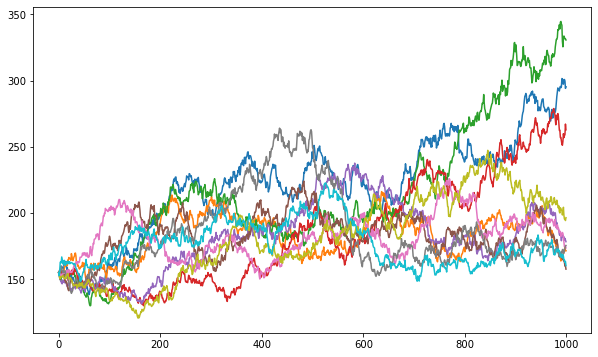

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);